In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




In [105]:
# Import data
df =pd.read_csv('medical_examination.csv')
odf=df
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Having the first views on the data:

In [110]:
df.isnull().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [80]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


* Add an `overweight` column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [81]:
IBM=df['weight']/((df['height']/100)**2)
df['overweight']=IBM

In [82]:
df.loc[df['overweight']<=25,'overweight']=0
df.loc[df['overweight']>25,'overweight']=1

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.0


### After doing the project I learnt a better way to do this:

In [83]:
odf['overweight'] = (odf['weight'] / (odf['height']/100)**2).apply(lambda x: 1 if x > 25 else 0)

* Normalize the data by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1.

In [84]:
df.loc[df['gluc']==1,'gluc']=0
df.loc[df['gluc']>1,'gluc']=1


In [85]:
df.loc[df['cholesterol']==1,'cholesterol']=0
df.loc[df['cholesterol']>1,'cholesterol']=1
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


### As it occured before, these previous steps could have been done as:

In [86]:
odf['cholesterol'] = odf['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
odf['gluc'] = odf['gluc'].apply(lambda x: 0 if x == 1 else 1)

* Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. The chart should look like `examples/Figure_1.png`.

In [87]:
nueva=df[['cardio','active','alco','cholesterol','gluc','overweight','smoke']]
nueva

,cardio,active,alco,cholesterol,gluc,overweight,smoke
0,0,1,0,1,1,0,0
1,1,1,0,0,1,1,0
2,1,0,0,0,1,0,0
3,1,1,0,1,1,1,0
4,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...
69995,0,1,0,1,1,1,1
69996,1,1,0,0,0,1,0
69997,1,0,1,0,1,1,0
69998,1,0,0,1,0,1,0


In [88]:
longnueva=pd.melt(nueva,['cardio'])
longnueva['value'].dtype
longnueva.astype({'value': 'int8'})

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


Checking that all the data has reasonable values:

In [89]:
longnueva.describe()

,cardio,value
count,420000.000000,420000.000000
mean,0.499700,0.527629
std,0.500001,0.499237
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Making the graph in seaborne

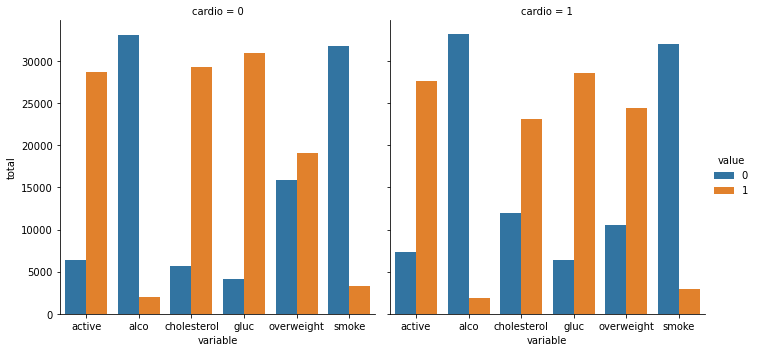

In [90]:
g = sns.catplot(x="variable",hue='value',col='cardio',
                data=longnueva,
                kind="count").set(ylabel='total')


### Here I leave written the approach of other people as a bar graph

In [99]:
#This first line is just making a long dataFrame
odf_cat=pd.melt(odf,id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
#In this second line we are preparing the data frame to draw a bar graph
odf_cat = pd.DataFrame(odf_cat.groupby(['variable', 'value', 'cardio'])['value'].count()).rename(columns={'value': 'total'}).reset_index()
odf_cat

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,33156
6,alco,1,0,1941
7,alco,1,1,1823
8,cholesterol,0,0,5691
9,cholesterol,0,1,11924


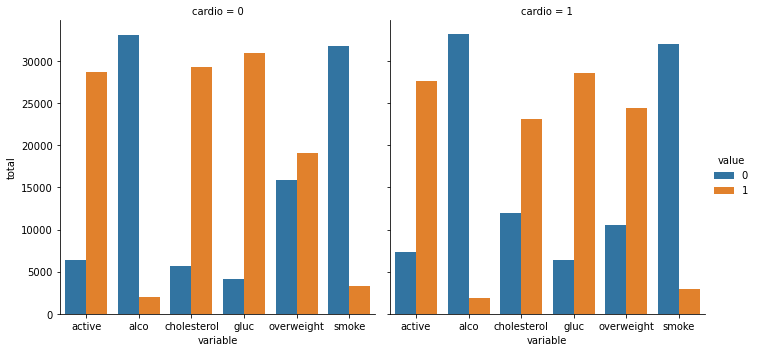

In [95]:
sns.catplot(x="variable",y='total',hue='value',col='cardio',
                data=odf_cat,
                kind="bar")

## Filtering Data

Correct incorrections: Diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

In [50]:
df_corrected=df.loc[df['ap_lo'] <= df['ap_hi']]
df_corrected

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


Filter out: Height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))

In [51]:
df_corrected2=df_corrected.loc[df_corrected['height'] >= df_corrected['height'].quantile(0.025)]
df_corrected2

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


In [52]:
df_corrected2['height'].quantile(0.975)

180.0

Filter out: Height is more than the 97.5th percentile

In [53]:
df_corrected3=df_corrected2.loc[df_corrected2['height'] <= df_corrected2['height'].quantile(0.975)]


Filter out: weight is less than the 2.5th percentile and weight is more than the 97.5th percentile

In [54]:
df['weight'].quantile(0.975)

108.0

In [55]:
df_corrected4=df_corrected3.loc[(df_corrected3['weight'] >= df_corrected3['weight'].quantile(0.025)) & (df_corrected3['weight'] <= df_corrected3['weight'].quantile(0.975))]

In [56]:
df_corrected4

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0.0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1.0
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


### The way I did it implies in filtering more values. Since the data frame shrinks the values for the successive filters, the final data frame becomes a little tinier. Another way to do it if you want to avoid this from happening is picking the values to filter from the first database:

In [ ]:

    odf_heat = odf[(odf['ap_lo']<=odf['ap_hi']) &
    (odf['height'] >= odf['height'].quantile(0.025))&
    (odf['height'] <= odf['height'].quantile(0.975))&
    (odf['weight'] >= odf['weight'].quantile(0.025))&
    (odf['weight'] <= odf['weight'].quantile(0.975))
    ]



### Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. The chart should look like examples/Figure_2.png.

In [92]:
dfcorr=df_corrected4.corr()


In [93]:
mask = np.triu(np.ones_like(dfcorr, dtype=bool))


<AxesSubplot:>

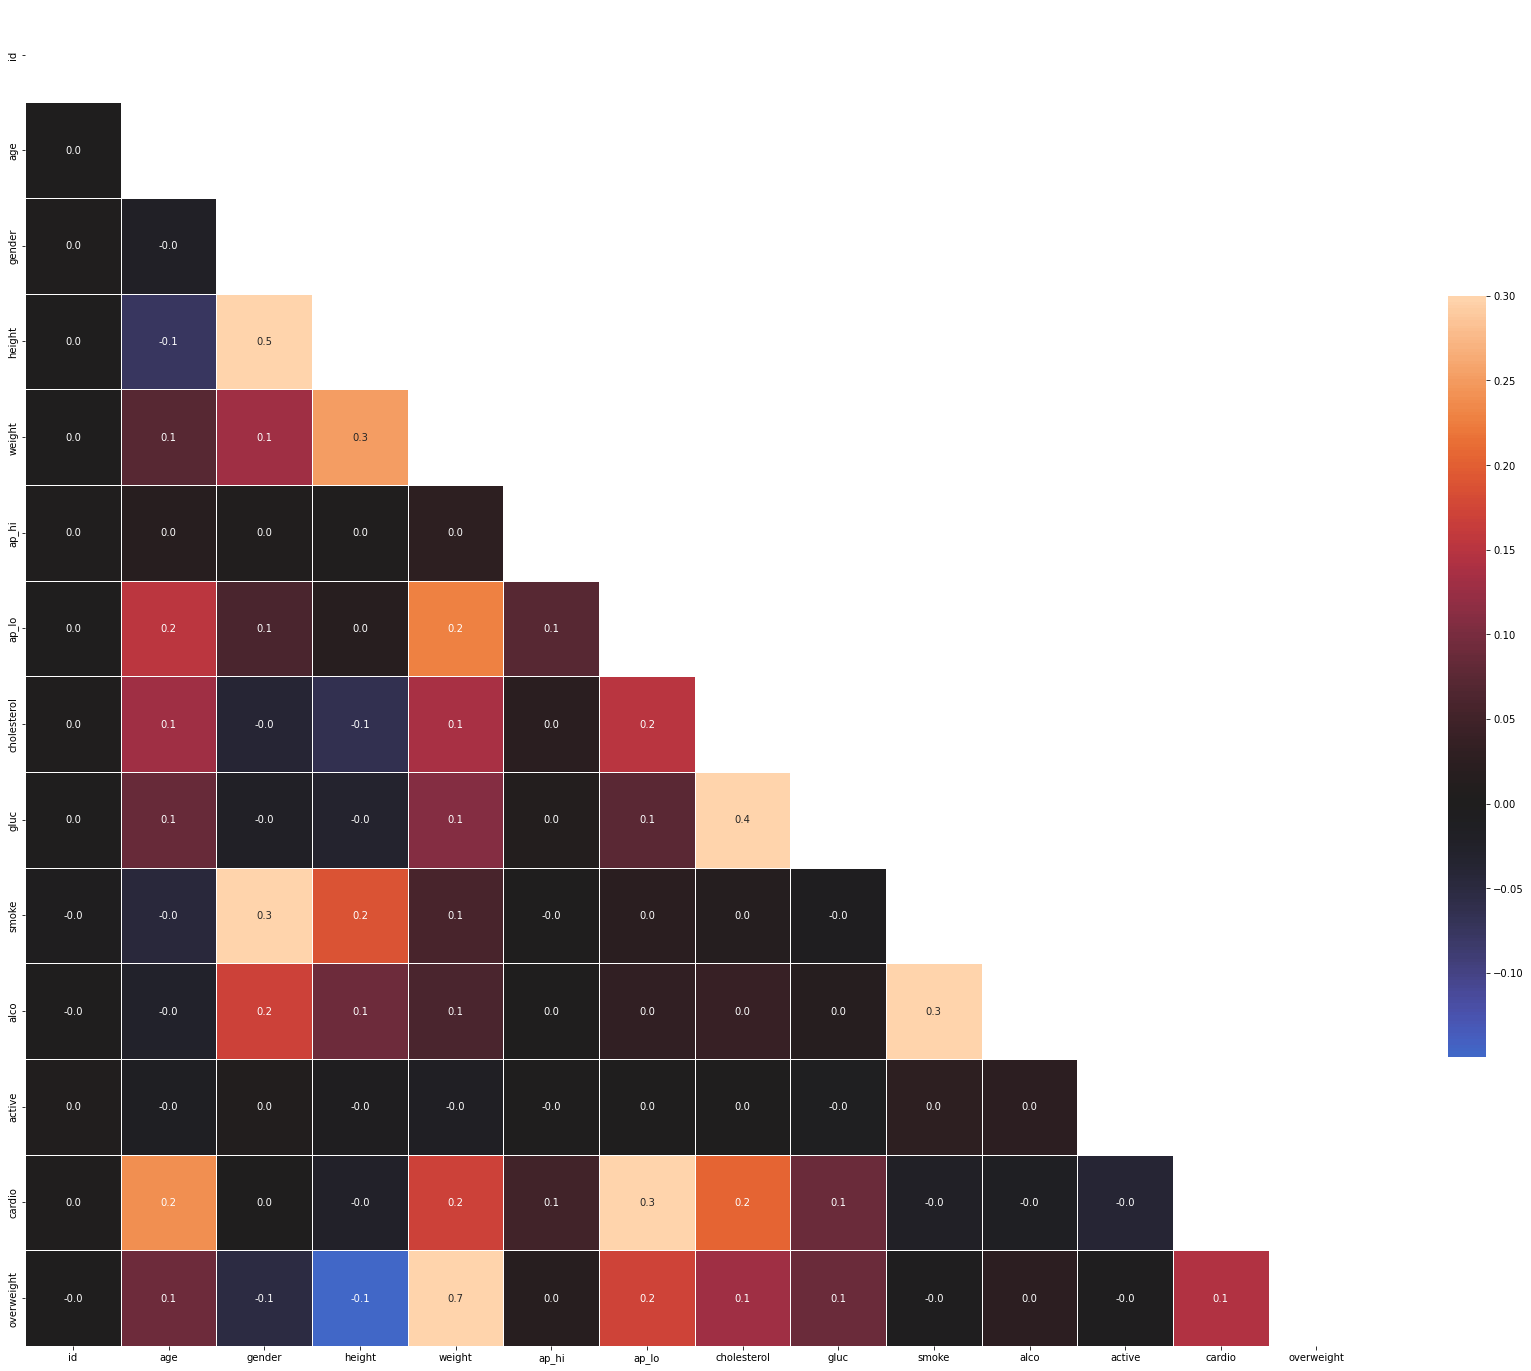

In [94]:
f, ax = plt.subplots(figsize=(30, 28))
sns.heatmap(dfcorr, mask=mask, fmt='.1f', vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### Doing it by filtering from the mother df:

<AxesSubplot:>

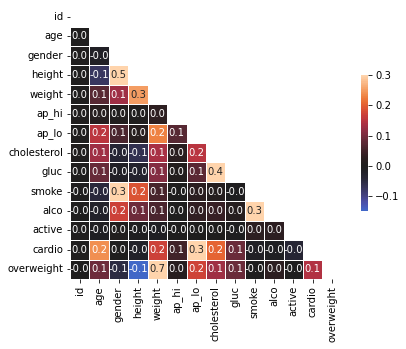

In [49]:

    # Calculate the correlation matrix
    corr = odf_heat.corr()
    

    # Generate a mask for the upper triangle
   
    mask = np.triu(corr)
    

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(7, 5))
    

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr,mask=mask, fmt='.1f',vmax=.3, linewidths=.5,square=True, cbar_kws = {'shrink':0.5},annot=True, center=0)

In [57]:
df_heat.equals(df_corrected4)

False